# Submit widget
To demo, run all cells then click Appmode to activate the dashboard preview. Click the Run button to run the simulation.

Note that this example uses submit cacheing. See the [Submit Widget -- Parametric](SubmitWidget-Parametric.ipynb) notebook for more information about Submit Cacheing.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from hublib.ui import Submit
import numpy as np
import ipywidgets as w
from IPython.display import display

<IPython.core.display.Javascript object>

In [2]:
# need this because this example is running in a read-only directory
import os
try:
    os.mkdir('/tmp/submit')
except:
    pass
os.chdir('/tmp/submit')

In [ ]:
# Note: The following two commands may return warnings, which can be disregarded.

In [3]:
!rm out.log

In [4]:
!ls -l fo

ls: cannot access 'fo': No such file or directory


# RC Circuit

<img  src="rc.png" style="width: 10%; float: left"/>
A capacitor is charged in series with a resistor.  
The voltage across the capacitor can be expressed as
$V_c(t) = V_0(1-e^{-t/(R*C)})$

Clearly we don't need to use Submit to have this run on a cluster.  But for this example, we want something simple so we can get results quickly.

In [5]:
# this is the function called when the run button is clicked
import os
def my_start(s):
    # get a unique runname 
    rname = s.make_rname(vin.value)
   
    # run locally for this demo, but it works on other venues
    submit_str = '--local /apps/pegtut/current/examples/capacitor_voltage/sim1.py  --Vin=%s' % (vin.value)
    s.run(rname, submit_str)


In [6]:
# after the run finished, plot the data

def plot_data(s, rdir):
    plt.figure('Capacitor Voltage')  
    plt.clf()  # clear old plot

    # our simulation writes to 'out.log'
    vals = np.loadtxt('%s/out.log' % (rdir))
    x = vals[:,0]
    y = vals[:,1]
    plt.plot(x,y)
    plt.ylabel('$V_c$')
    plt.xlabel('Time (seconds)')
    plt.title('Vin = %.1f' % vin.value)
    plt.show()

In [7]:
# Just to show how it is done, we create two widgets linked
# to give the user different options for entering the input voltage

vin = w.FloatSlider(
    value=10,
    min=0,
    max=50.0,
    step=0.1,
    description='Vin:',
    readout_format='.1f',
)

vin2 = w.BoundedFloatText(
    min=0,
    max=50.0,
    description='Vin:',
)
mylink = w.jslink((vin, 'value'), (vin2, 'value'))

<IPython.core.display.Javascript object>


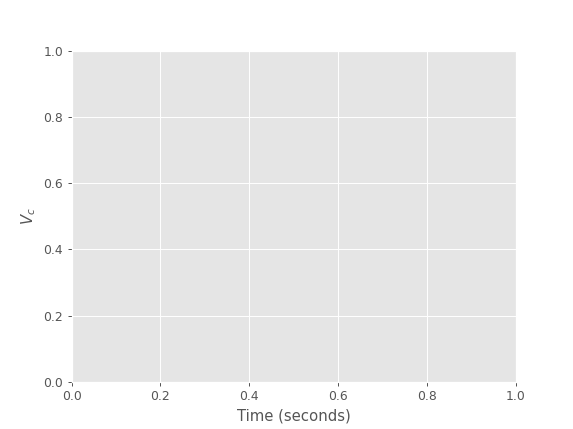

In [8]:
# we want the plot to go here, so create an empty one initially
plt.figure('Capacitor Voltage')
plt.ylabel('$V_c$')
plt.xlabel('Time (seconds)')
plt.show()

In [10]:
display(vin, vin2)

FloatSlider(value=10.0, description='Vin:', max=50.0, readout_format='.1f')

BoundedFloatText(value=10.0, description='Vin:', max=50.0)

In [11]:
Submit(start_func=my_start, done_func=plot_data, cachename='SubmitTest2')